In [2]:
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option("display.max_columns", 200)
pd.set_option("display.min_rows", 50)
pd.set_option("display.max_rows", 100)

default_df = pd.read_csv("./cards.csv", low_memory=False)

# Data analysis of all printed cards in MTG history

cards.csv contains information on all cards printed during MTG's history since 1993 until today.  
The file lists all printed cards not all cards, a card may appear multiple times because it has been reprinted with certain alterations.


## Quick overview


In [60]:
default_df.head()

,index,id,artist,asciiName,attractionLights,availability,boosterTypes,borderColor,cardKingdomEtchedId,cardKingdomFoilId,cardKingdomId,cardParts,cardsphereId,colorIdentity,colorIndicator,colors,convertedManaCost,defense,duelDeck,edhrecRank,edhrecSaltiness,faceConvertedManaCost,faceFlavorName,faceManaValue,faceName,finishes,flavorName,flavorText,frameEffects,frameVersion,hand,hasAlternativeDeckLimit,hasContentWarning,hasFoil,hasNonFoil,isAlternative,isFullArt,isFunny,isOnlineOnly,isOversized,isPromo,isRebalanced,isReprint,isReserved,isStarter,isStorySpotlight,isTextless,isTimeshifted,keywords,language,layout,leadershipSkills,life,loyalty,manaCost,manaValue,mcmId,mcmMetaId,mtgArenaId,mtgjsonFoilVersionId,mtgjsonNonFoilVersionId,mtgjsonV4Id,mtgoFoilId,mtgoId,multiverseId,name,number,originalPrintings,originalReleaseDate,originalText,originalType,otherFaceIds,power,printings,promoTypes,purchaseUrls,rarity,rebalancedPrintings,relatedCards,scryfallId,scryfallIllustrationId,scryfallOracleId,securityStamp,setCode,side,signature,subsets,subtypes,supertypes,tcgplayerEtchedProductId,tcgplayerProductId,text,toughness,type,types,uuid,variations,watermark
0,0,1,Pete Venters,NaN,NaN,"mtgo,paper",default,black,NaN,NaN,122719.0,NaN,20.0,W,NaN,W,7.0,NaN,NaN,19475.0,0.27,NaN,NaN,NaN,NaN,nonfoil,NaN,NaN,NaN,2003,NaN,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,First strike,English,normal,NaN,NaN,NaN,{5}{W}{W},7.0,16165.0,156.0,NaN,b7c19924-b4bf-56fc-aa73-f586e940bd42,NaN,ad41be73-582f-58ed-abd4-a88c1f616ac3,27501.0,27500.0,130550.0,Ancestor's Chosen,1,NaN,NaN,First strike (This creature deals combat damag...,Creature - Human Cleric,NaN,4,"10E,JUD,UMA",NaN,"{""cardKingdom"": ""https://mtgjson.com/links/9fb...",uncommon,NaN,NaN,7a5cd03c-4227-4551-aa4b-7d119f0468b5,be2f7173-c8b7-4172-a388-9b2c6b3c16e5,fc2ccab7-cab1-4463-b73d-898070136d74,NaN,10E,NaN,NaN,NaN,"Human,Cleric",NaN,NaN,15032.0,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,b7c19924-b4bf-56fc-aa73-f586e940bd42,NaN
1,1,2,Pete Venters,NaN,NaN,"mtgo,paper",default,black,NaN,123087.0,NaN,NaN,NaN,W,NaN,W,7.0,NaN,NaN,19475.0,0.27,NaN,NaN,NaN,NaN,foil,NaN,"""The will of all, by my hand done.""",NaN,2003,NaN,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,First strike,English,normal,NaN,NaN,NaN,{5}{W}{W},7.0,16165.0,156.0,NaN,NaN,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,fcd5d3ab-d58e-5cea-861a-cb377f37bf83,NaN,NaN,NaN,Ancestor's Chosen,1★,NaN,NaN,NaN,NaN,NaN,4,"10E,JUD,UMA",NaN,"{""cardKingdomFoil"": ""https://mtgjson.com/links...",uncommon,NaN,NaN,82072a1d-c1ab-4b4f-875f-d0591447e0a4,be2f7173-c8b7-4172-a388-9b2c6b3c16e5,fc2ccab7-cab1-4463-b73d-898070136d74,NaN,10E,NaN,NaN,NaN,"Human,Cleric",NaN,NaN,15032.0,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,b7c19924-b4bf-56fc-aa73-f586e940bd42,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,NaN
2,2,3,Volkan Baǵa,NaN,NaN,"mtgo,paper",default,black,NaN,NaN,122720.0,NaN,22.0,W,NaN,W,5.0,NaN,NaN,15665.0,NaN,NaN,NaN,NaN,NaN,nonfoil,NaN,Every tear shed is a drop of immortality.,NaN,2003,NaN,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,Flying,English,normal,NaN,NaN,NaN,{4}{W},5.0,16166.0,176.0,NaN,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,NaN,9eb2e54c-a12b-5e88-a9c0-d8c84c52d59c,26993.0,26992.0,129465.0,Angel of Mercy,2,NaN,NaN,Flying (This creature can't be blocked except ...,Creature - Angel,NaN,3,"10E,8ED,9ED,DDC,DVD,IMA,INV,JMP,MB1,P02,PS11,P...",NaN,"{""cardKingdom"": ""https://mtgjson.com/links/027...",uncommon,NaN,NaN,8f7980d4-da43-4d6d-ad16-14b8a34ae91d,e4d6c53f-e936-4be8-8b70-47c2be863b20,a2daaf32-dbfe-4618-892e-0da24f63a44a,NaN,10E,NaN,NaN,NaN,Angel,NaN,NaN,15033.0,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,NaN
3,3,4,Volkan Baǵa,NaN,NaN,"mtgo,paper",default,black,NaN,123088.0,NaN,NaN,NaN,W,NaN,W,5.0,NaN,NaN,15665.0,NaN,NaN,NaN,NaN,NaN,foil,NaN,Every tear shed is a drop of immortality.,N

## Who are the most productive artists ?

I prefered to seperate the cards illustrated by one artist and the cards illustrated by two artist.


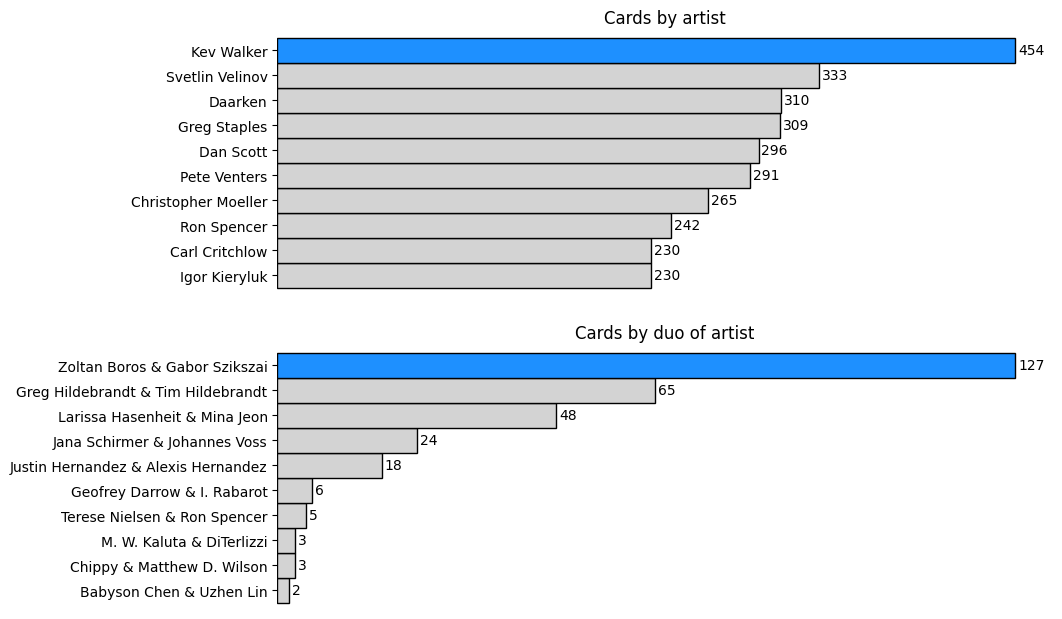

In [4]:
df = default_df[["name", "artist"]].dropna().drop_duplicates()


# separate solo and duo, by applying a mask
top_x = 10
df["mask"] = df["artist"].str.contains("&")  # & present if duo
df_solo = df[~df["mask"]].value_counts("artist", ascending=True)[-top_x:]
df_duo = df[df["mask"]].value_counts("artist", ascending=True)[-top_x:]

fig, axes = plt.subplots(nrows=2, figsize=(10, 7.5))
for axe in axes:  # remove the plot borders for each plot
    for side in ["top", "bottom", "right", "left"]:
        axe.spines[f"{side}"].set_visible(False)

solo_plot = df_solo.plot(
    kind="barh",
    ax=axes[0],
    rot=0,
    edgecolor="k",
    color=["dodgerblue" if x == 0 else "lightgrey" for x in range(top_x)][::-1],
    width=1,
    title="Cards by artist",
    ylabel="",
)
solo_plot.tick_params("x", which="both", bottom=False, labelbottom=False)
solo_plot.bar_label(solo_plot.containers[0], padding=2)

duo_plot = df_duo.plot(
    kind="barh",
    ax=axes[1],
    rot=0,
    edgecolor="black",
    color=["dodgerblue" if x == 0 else "lightgrey" for x in range(top_x)][::-1],
    width=1,
    title="Cards by duo of artist",
    ylabel="",
)
duo_plot.tick_params("x", which="both", bottom=False, labelbottom=False)
duo_plot.bar_label(duo_plot.containers[0], padding=2)

None  # avoid useless output

## What are the 10 most reprinted cards ?

I preferred to exclude the lands because they will obviously be in the top.  
I added the number of unique illustrations that can be found among all the printed versions.


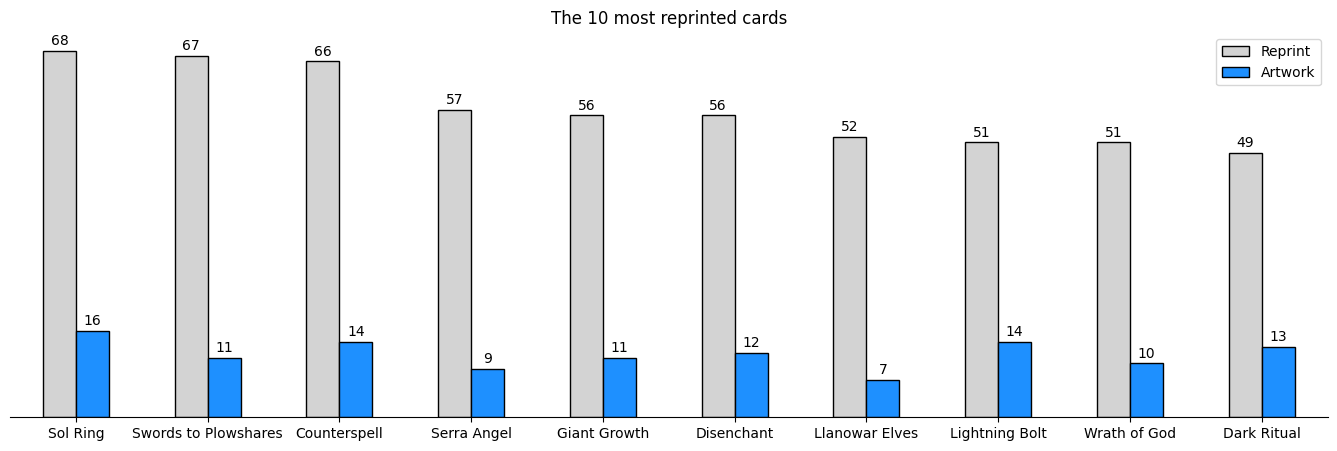

In [5]:
df = default_df.loc[
    (default_df["types"] != "Land"),  # exclude all lands
    ["name", "types", "scryfallIllustrationId"],
]

# assemble the data to plot
temp_df = pd.DataFrame()
temp_df["Reprint"] = df["name"].value_counts()
pair = ["name", "scryfallIllustrationId"]
temp_df["Artwork"] = df[pair].drop_duplicates().groupby("name").count()
df = temp_df[:10]

fig, axes = plt.subplots(figsize=(17, 5))
for side in ["top", "right", "left"]:  # remove the plot borders
    axes.spines[f"{side}"].set_visible(False)

plot = df.plot(
    kind="bar",
    ax=axes,
    title="The 10 most reprinted cards",
    xlabel="",
    ylabel="",
    rot=0,
    edgecolor="black",
    color={"Artwork": "dodgerblue", "Reprint": "lightgrey"},
)
plot.tick_params("y", which="both", left=False, labelleft=False)
plot.bar_label(plot.containers[0], padding=2)
plot.bar_label(plot.containers[1], padding=2)

None

## What is the proportion of original concept ?


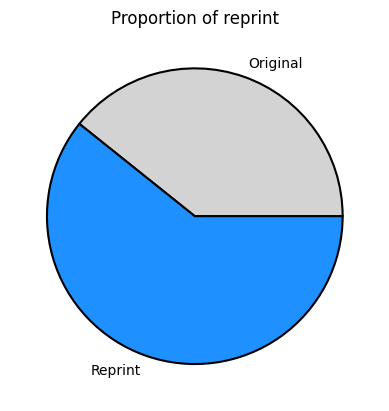

In [6]:
df = default_df

original = default_df[default_df["isReprint"] == 1].shape[0]
reused = default_df.shape[0] - original

# assemble the number of reprint and original print
df = pd.Series(data={"Original": reused, "Reprint": original})

plot = df.plot.pie(
    startangle=0,
    title="Proportion of reprint",
    colors=["lightgrey", "dodgerblue"],
    wedgeprops={"edgecolor": "black", "linewidth": 1.5, "antialiased": True},
)

None

## What are the most used keyword abilities?

Plot the most used keyword abilities among all cards, not just creature cards.


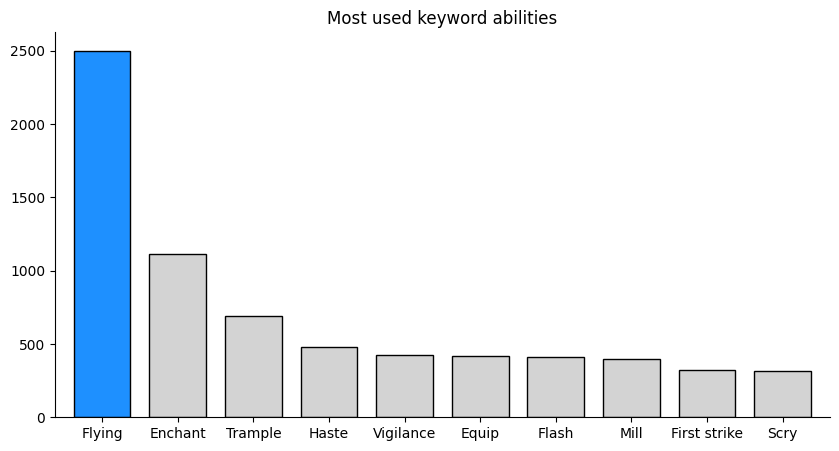

In [7]:
df = default_df.drop_duplicates("name")

# parse the keywords columns and retrieve the most used abilities
df = (
    df["keywords"]
    .dropna()
    .str.split(",", expand=True)
    .stack(dropna=True)
    .value_counts()[:10]
)

fig, axes = plt.subplots(figsize=(10, 5))
for side in ["top", "right"]:  # remove some plot borders
    axes.spines[f"{side}"].set_visible(False)

plot = df.plot(
    kind="bar",
    ax=axes,
    title="Most used keyword abilities",
    xlabel="",
    ylabel="",
    rot=0,
    width=0.75,
    edgecolor="black",
    color=["dodgerblue" if x == 0 else "lightgrey" for x in range(10)],
)

None

## What are the most referenced words in flavor texts ?


In [62]:
df = default_df["flavorText"].dropna().drop_duplicates()

df = (
    df.str.replace("[^ a-z A-Z - ' ]", " ", regex=True)
    .str.replace("[ ]+", " ", regex=True)
    .str.strip()
    .str.split(" ", expand=True)
    .stack(dropna=True)
    .value_counts()
)


# i need to find a way to isolate names


df

the               18113
of                10097
to                 7631
a                  6331
and                5389
The                3998
is                 3828
in                 3513
it                 2658
I                  2511
for                2376
you                2161
that               1990
are                1958
their              1872
as                 1869
with               1694
be                 1543
but                1507
from               1370
its                1358
not                1323
on                 1297
will               1271
your               1232
was                1231
they               1225
have               1157
can                1099
all                1081
one                1062
his                1053
by                 1026
my                 1010
them                955
no                  950
It                  889
an                  869
at                  845
only                806
her                 795
A               